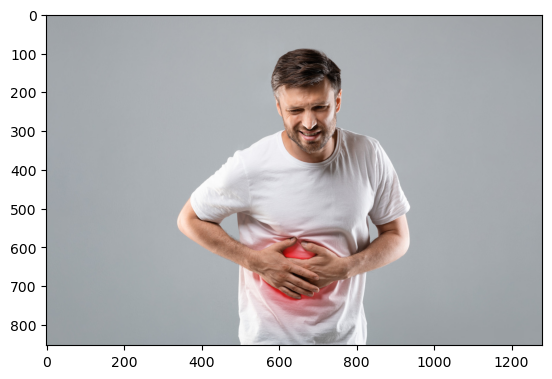

1/1 [==============================] - 0s 78ms/step


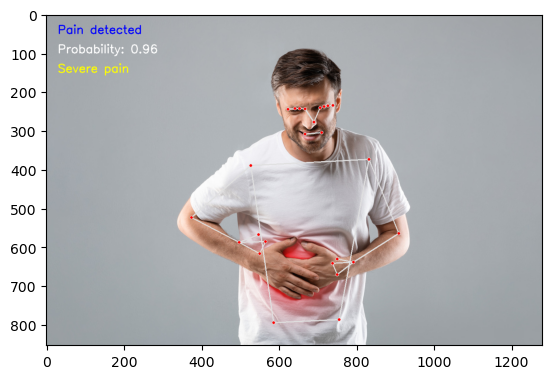

In [48]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import tensorflow as tf

# Load saved model
model = tf.keras.models.load_model('pain_detection_model.h5')

# Initialize Mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic
#mp_face_detection = mp.solutions.face_detection

# Read image file
image = cv2.imread('does-fatty-liver-cause-pain.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Convert image to RGB for Mediapipe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Detect poses in image using Mediapipe
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose, \
     mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
     
        results = pose.process(image)
        results_holistic = holistic.process(image)
    
        # Draw poses on image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        #mp_drawing.draw_landmarks(image, results_holistic.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
        mp_drawing.draw_landmarks(image, results_holistic.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results_holistic.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
        # Get coordinates of left and right shoulders
        #left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER]
        #right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    
        # Calculate Euclidean distance between left and right shoulders
        #distance = np.sqrt((left_shoulder.x - right_shoulder.x)**2 + (left_shoulder.y - right_shoulder.y)**2)
     
       
        # Resize image and make prediction using saved model
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize = tf.image.resize(image, (256,256))
        prediction = model.predict(np.expand_dims(resize/255, 0))
        
        # Display text indicating whether pain was detected
        if prediction > 0.5:
            cv2.putText(image, 'Pain detected', (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            if prediction <= 0.33:
                cv2.putText(image, 'Mild pain', (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            elif prediction > 0.33 and prediction <= 0.66:
                cv2.putText(image, 'Moderate pain', (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        
            else:
                cv2.putText(image, 'Severe pain', (30,150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
                 
            
        else:
            cv2.putText(image, 'No pain detected', (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Display probability of pain detection
        cv2.putText(image, f'Probability: {prediction[0][0]:.2f}', (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
           
 # Display 
plt.imshow(image)
plt.show()  

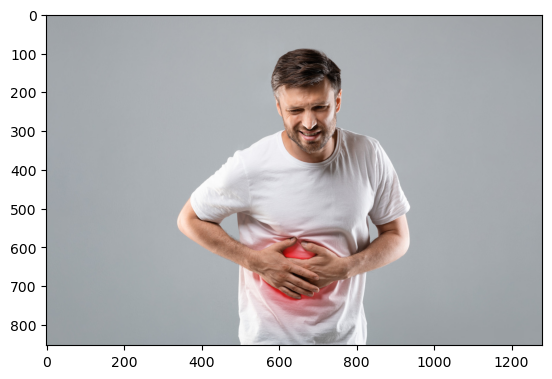

1/1 [==============================] - 0s 86ms/step


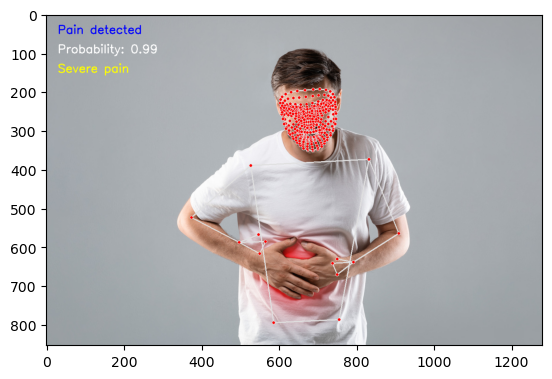

In [50]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import tensorflow as tf

# Load saved model
model = tf.keras.models.load_model('pain_detection_model.h5')

# Initialize Mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

# Read image file
image = cv2.imread('does-fatty-liver-cause-pain.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Convert image to RGB for Mediapipe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Detect poses in image using Mediapipe
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose, \
     mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
     
        results = pose.process(image)
        results_holistic = holistic.process(image)
    
        # Draw poses on image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results_holistic.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
        mp_drawing.draw_landmarks(image, results_holistic.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(image, results_holistic.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
       
        # Resize image and make prediction using saved model
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize = tf.image.resize(image, (256,256))
        prediction = model.predict(np.expand_dims(resize/255, 0))
        
        # Display text indicating whether pain was detected
        if prediction > 0.5:
            cv2.putText(image, 'Pain detected', (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            
            if prediction <= 0.33:
                cv2.putText(image, 'Mild pain', (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            elif prediction > 0.33 and prediction <= 0.66:
                cv2.putText(image, 'Moderate pain', (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        
            else:
                cv2.putText(image, 'Severe pain', (30,150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
                 
            
        else:
            cv2.putText(image, 'No pain detected', (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Display probability of pain detection
        cv2.putText(image, f'Probability: {prediction[0][0]:.2f}', (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
           
 # Display 
plt.imshow(image)
plt.show()  